In [35]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
%matplotlib notebook 


In [36]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
X_train

array([[ 3.5,  1. ],
       [ 5.5,  1.8],
       [ 5.7,  2.5],
       [ 5. ,  1.5],
       [ 5.8,  1.8],
       [ 3.9,  1.1],
       [ 6.1,  2.3],
       [ 4.7,  1.6],
       [ 3.8,  1.1],
       [ 4.9,  1.8],
       [ 5.1,  1.5],
       [ 4.5,  1.7],
       [ 5. ,  1.9],
       [ 4.7,  1.4],
       [ 5.2,  2. ],
       [ 4.5,  1.6],
       [ 1.6,  0.2],
       [ 5.1,  1.9],
       [ 4.2,  1.3],
       [ 3.6,  1.3],
       [ 4. ,  1.3],
       [ 4.6,  1.4],
       [ 6. ,  1.8],
       [ 1.5,  0.2],
       [ 1.1,  0.1],
       [ 5.3,  1.9],
       [ 4.2,  1.2],
       [ 1.7,  0.2],
       [ 1.5,  0.4],
       [ 4.9,  1.5],
       [ 1.5,  0.2],
       [ 5.1,  1.8],
       [ 3. ,  1.1],
       [ 1.4,  0.3],
       [ 4.5,  1.5],
       [ 6.1,  2.5],
       [ 4.2,  1.3],
       [ 1.4,  0.1],
       [ 5.9,  2.1],
       [ 5.7,  2.3],
       [ 5.8,  2.2],
       [ 5.6,  2.1],
       [ 1.6,  0.2],
       [ 1.6,  0.2],
       [ 5.1,  2. ],
       [ 5.7,  2.1],
       [ 1.3,  0.3],
       [ 5.4,

<IPython.core.display.Javascript object>


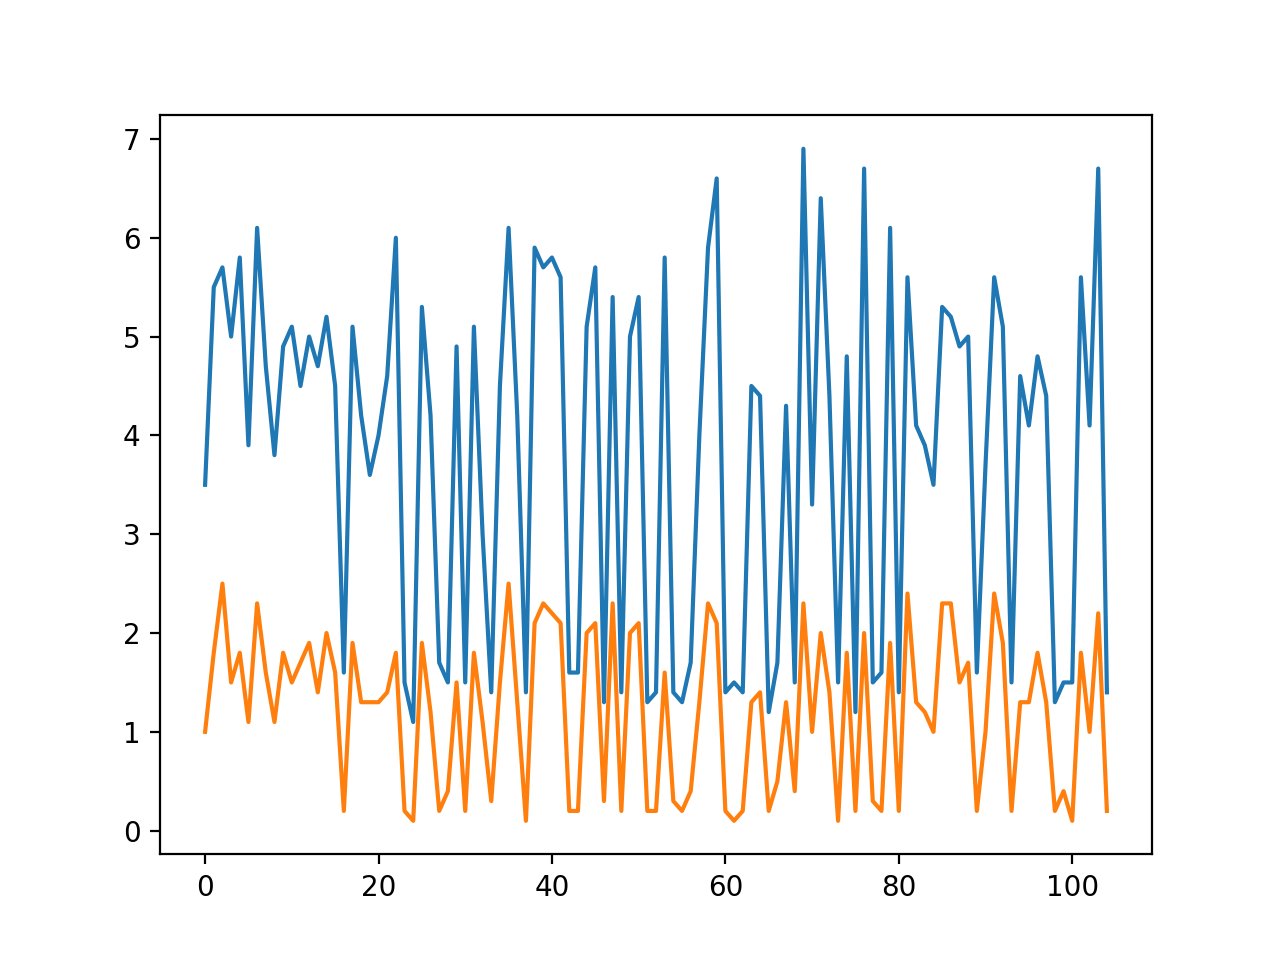

In [39]:
plt.plot(X_train)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)         #estimate mean and std for each dimension of training data
X_train_std = sc.transform(X_train)  #standardise data by calling transform function
X_test_std = sc.transform(X_test)

<IPython.core.display.Javascript object>


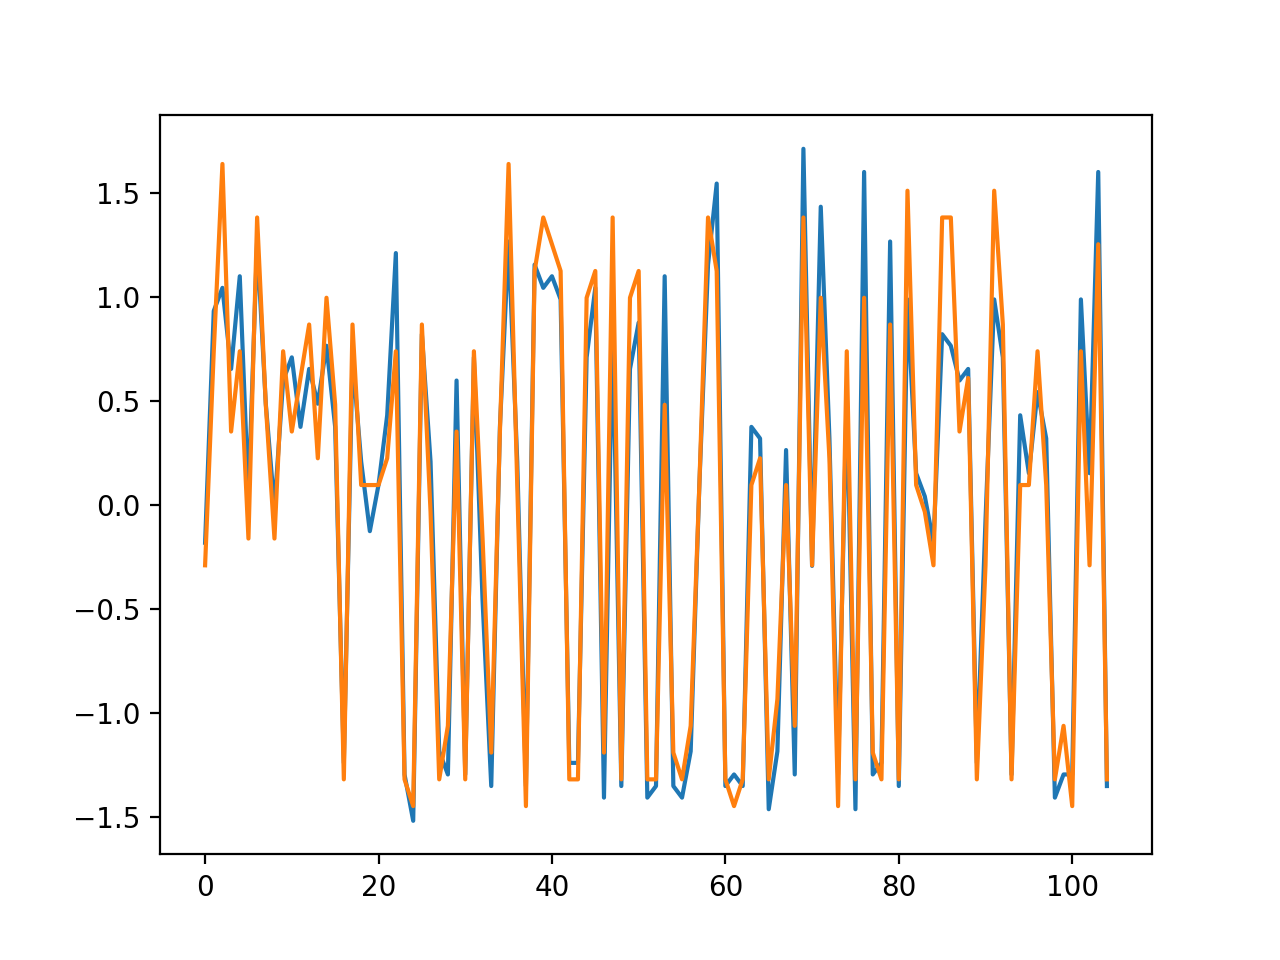

In [41]:
plt.plot(X_train_std)
plt.show()

# start trainging the perceptron

Most algorithms in scikit-learn already support multiclass classification by default via the One-vs.-Rest (OvR)

In [42]:
from sklearn.linear_model import Perceptron            # loading  perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)  # create perceptron
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

# make a prediction

In [43]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


On executing the preceding code, we see that the perceptron misclassifies 4 out of the 45 flower samples. Thus, the misclassification error on the test dataset is 0.089 or 8.9 percent (4 / 45 ≈ 0.089). So, 1 - misclassification error = 0.911 or 91.1 percent of accuracy.

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


# ploting decisiton region

In [45]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [63]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)    
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

<IPython.core.display.Javascript object>


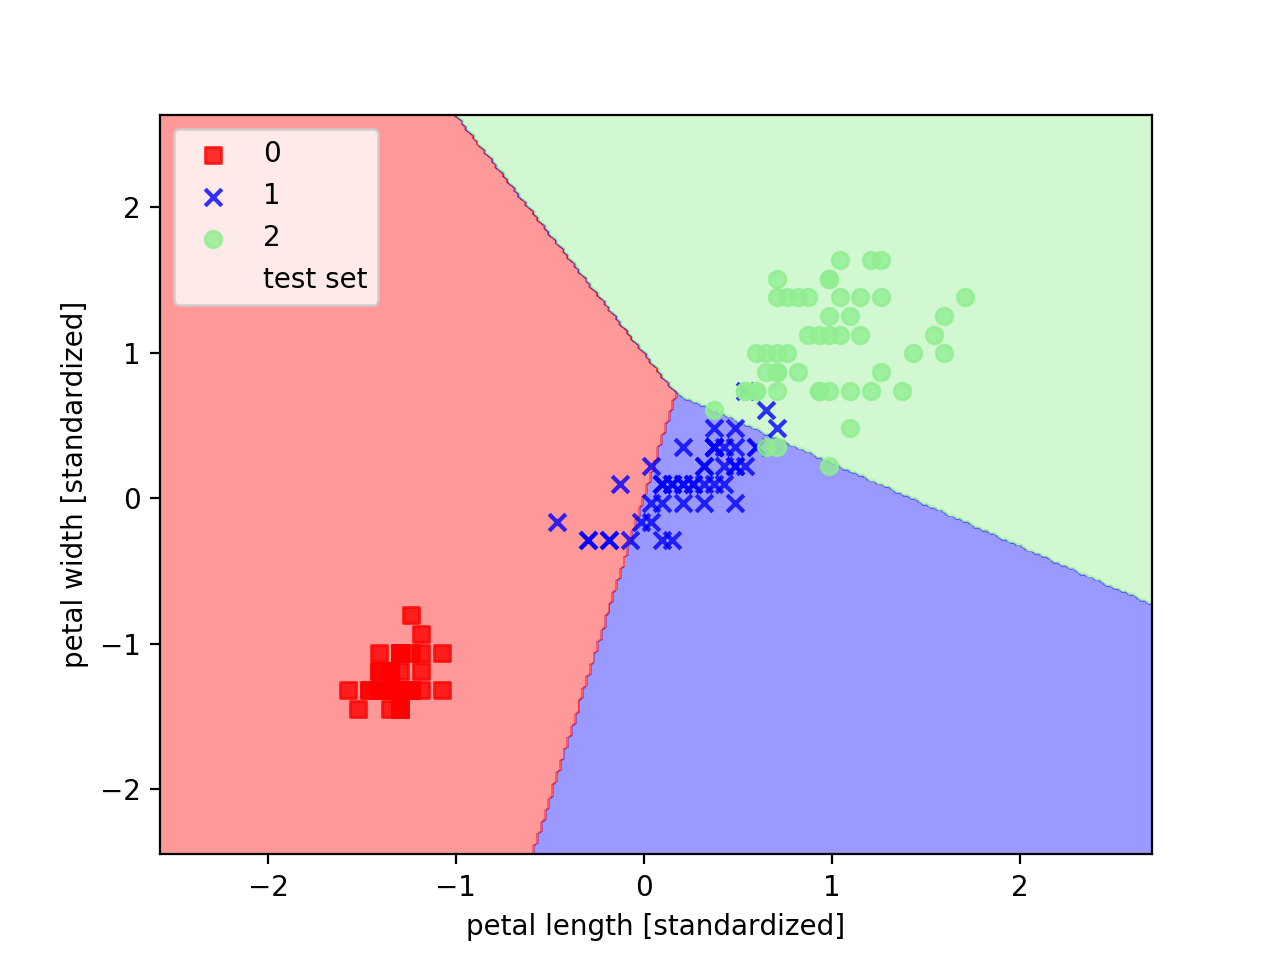

In [64]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


In [ ]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

As we can see in the resulting plot, the three flower classes cannot be perfectly separated by a linear decision boundaries. The perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice. 

In the following sections,
we will look at more powerful linear classifiers that converge to a cost minimum even if the classes are not perfectly linearly separable.